In [27]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#The purpose of this script is to identify which normalization method will give us the weakest sample effect.
#As the purpose of this technology is to allow integration of studies for more robust statistical results,
#the first level of variability to overcome is the study effect

#Possible normalization schemes:
#1. Relative Abundances
#2. Log transform of abundances
#3. DeSeq variance stabilization
#4. Cumulative Sum Scaling normalization

#Process:
#Normalize the training otu table with each of the above schemes, then measure the difference between studies in the freshwater environmental dataset.
#In the American gut project, (don't have batch information)

In [222]:
f = open("data/AG_new/otu_train.obj", "rb")
otu_train = pickle.load(f)
f.close()

f = open("data/AG_new/map_train.obj", "rb")
map_train = pickle.load(f)
f.close()

f = open("data/AG_new/qual_vecs.obj", "rb")
qual_vecs = pickle.load(f)
f.close()

In [223]:
def embed(otu, qual_vecs):
    qual_vecs_use = qual_vecs.loc[list(otu.columns.values)]
    df = pd.DataFrame(np.dot(otu, qual_vecs_use), index = otu.index.values)
    return(df)

In [175]:
#Normalize for relative abundances

def rel_abund_normalize(otu):
    #Normalize
    sample_sums = otu.sum(axis=1)
    otu_norm = otu.div(sample_sums, axis=0)
    return(otu_norm)

otu_rel_abund = rel_abund_normalize(otu_train)

In [176]:
#Normalize with log transforms (take the log of every taxa abundance, after adding 1 to each. The idea is we want to tamper
#down the variances at the high abundances while keeping the variance at the low abundances to)

def log_normalize(otu):
    return(np.log(otu + 1))

otu_logNorm = log_normalize(otu_train)

In [15]:
#Normalize using DeSeq algorithm
#Never managed the r2py magic, so we'll do it in r, save the file, then import it here
#We would need a grouping to normalize around with DeSeq. Need to look into a way to do fancier stabilization without
#grouping, and also figure out why you require grouping in the first place

OTUID,86,1395,1410,1808,1871,1900,1952,2195,2222,2228,...,4483911,4483963,4484010,4484034,4484060,4484075,4484111,4484176,4484193,4484382
10317.000001001,0.000000,0.0,0.0,0.0,0.0,0.0,5.690359,0.0,0.0,0.0,...,0.0,0.693147,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
10317.000001004,0.000000,0.0,0.0,0.0,0.0,0.0,5.438079,0.0,0.0,0.0,...,0.0,1.386294,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
10317.000001008,0.000000,0.0,0.0,0.0,0.0,0.0,7.515345,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
10317.000001020,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,...,0.0,1.098612,0.0,0.000000,0.0,2.484907,0.0,0.0,0.0,0.0
10317.000001026,0.000000,0.0,0.0,0.0,0.0,0.0,5.529429,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
10317.000001032,0.693147,0.0,0.0,0.0,0.0,0.0,6.315358,0.0,0.0,0.0,...,0.0,0.000000,0.0,1.386294,0.0,0.000000,0.0,0.0,0.0,0.0
10317.000001038,0.000000,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,...,0.0,6.406880,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,0.0
10317.000001041,0.000000,0.0,0.0,0.0,0.0,0.0,4.442651,0.0,0.0,0.0,...,0.0,4.304065,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
10317.000001042,0.000000,0.0,0.0,0.0,0.0,0.0,2.484907,0.0,0.0,0.0,...,0.0,5.971262,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,0.0
10317.000001046,0.000000,0.0,0.0,0.0,0.0,0.0,3.931826,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [197]:
#CSS normalization
#Metagenome seq does not exist in python. We'll do this in R too, and read in the file
otu_cssNorm = pd.read_csv("data/AG_new/otu_train_cssNorm.csv")

C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [198]:
otu_cssNorm2 = pd.DataFrame(otu_cssNorm, index = [str(i) for i in otu_cssNorm.index.values])

In [219]:
#PCA with each
from sklearn.decomposition import PCA
def plotPCA(table, color = "input"):
    pca = PCA(n_components= 5)
    pca.fit(table)
    table_pca = pca.transform(table)
    table_pca = table_pca / np.max(table_pca)
    df = pd.DataFrame(table_pca, index = table.index.values)
    #df.add(mapping.temperature_deg_c)
    plt.figure(figsize=(10,5))
    x = df.iloc[:,1].values
    y = df.iloc[:,2].values
    #fig, ax = plt.subplots()
    sample_sums = otu_train.sum(axis = 1)
    sample_sums_table = table.sum(axis = 1)
    if color == "input":
        plt.scatter(x,y, c = sample_sums_table, cmap='viridis', label = sample_sums_table)
    if color == "raw":
        plt.scatter(x,y, c = sample_sums, cmap='viridis', label = sample_sums)
    #ax.xlabel(pca.explained_variance_ratio_[0])
    #ax.ylabel(pca.explained_variance_ratio_[1])
    cbar = plt.colorbar()
    cbar.set_label("Sequencing Depth")
    return(x, y)



(array([-0.00022491,  0.00166529, -0.00043362, ..., -0.0002754 ,
        -0.00014663, -0.00049433]),
 array([ 1.17864102e-05, -9.71420250e-04, -2.40073629e-04, ...,
        -7.96431474e-05, -3.27408225e-06, -2.24342592e-04]))

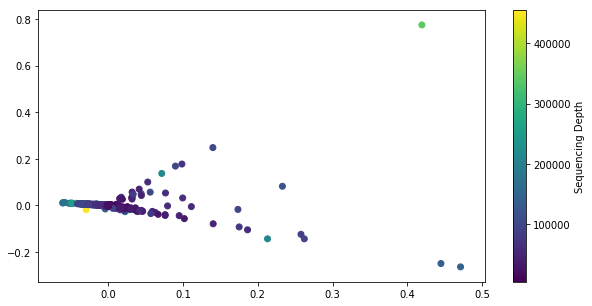

In [220]:
plotPCA(otu_cssNorm, color = "input")

In [206]:
#Drop Them
print(otu_cssNorm.shape)
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(y == max(y))[0][0]])
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(x == max(x))[0][0]])
#Still weirdo
print(otu_cssNorm.shape)

(5820, 10498)
(5818, 10498)


(5685, 10498)


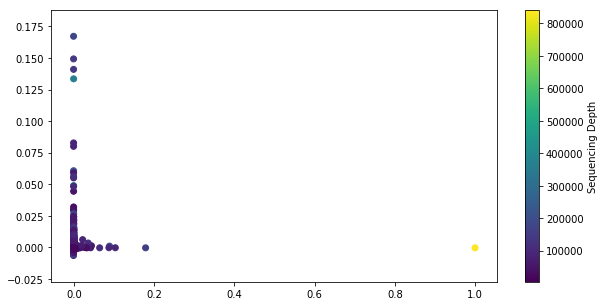

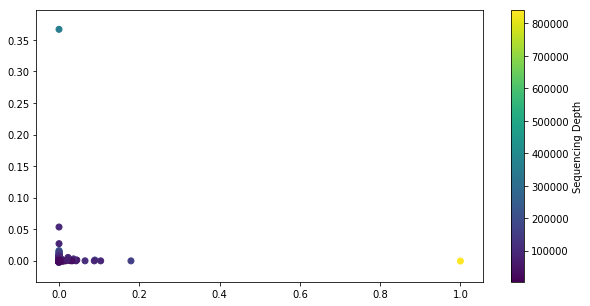

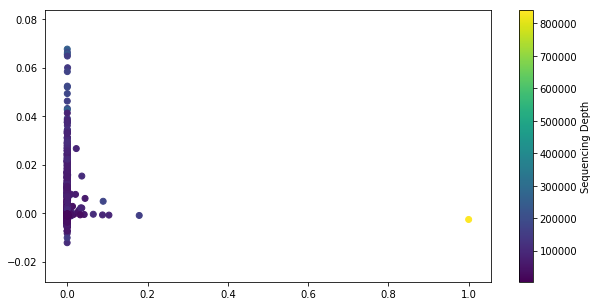

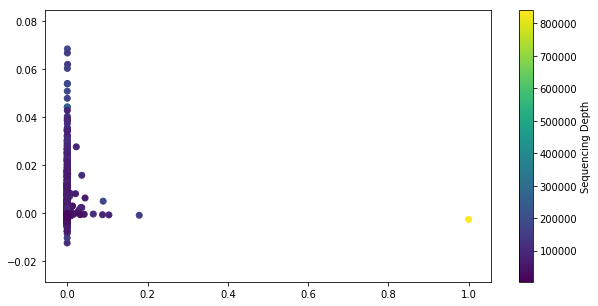

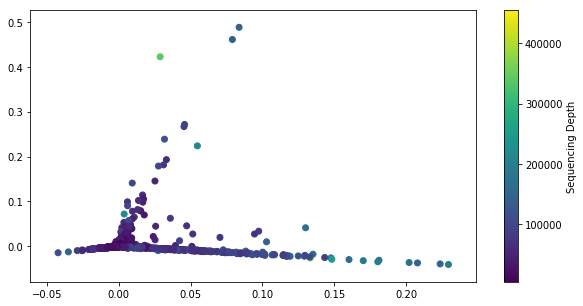

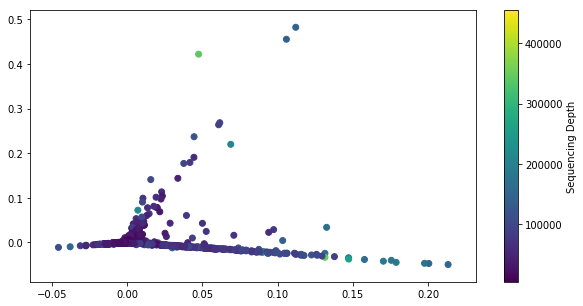

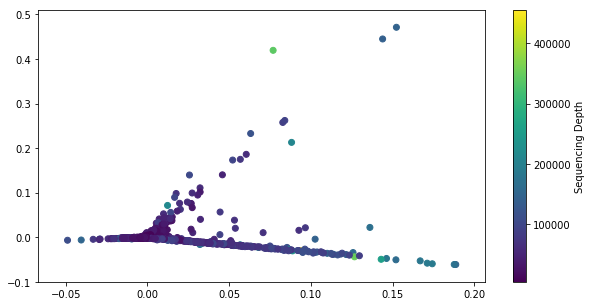

In [214]:
print(otu_cssNorm.shape)
x, y = plotPCA(otu_cssNorm, color = "input")

#Drop Them
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(y == max(y))[0][0]])
x, y = plotPCA(otu_cssNorm, color = "input")
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(y == max(y))[0][0]])
x, y = plotPCA(otu_cssNorm, color = "input")
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(y == max(y))[0][0]])
x, y = plotPCA(otu_cssNorm, color = "input")
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(x == max(x))[0][0]])
x, y = plotPCA(otu_cssNorm, color = "input")
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(x == max(x))[0][0]])
x, y = plotPCA(otu_cssNorm, color = "input")
otu_cssNorm = otu_cssNorm.drop(otu_cssNorm.index[np.where(x == max(x))[0][0]])
x, y = plotPCA(otu_cssNorm, color = "input")

(array([-0.01708642, -0.01374937,  0.0013398 , ..., -0.00522054,
        -0.01003517,  0.00607453]),
 array([ 0.02080161, -0.00165609, -0.00439796, ..., -0.00788713,
        -0.00614981, -0.00447745]))

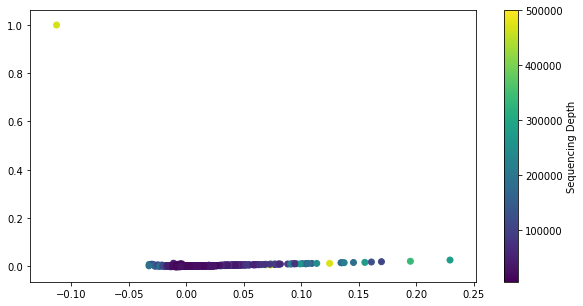

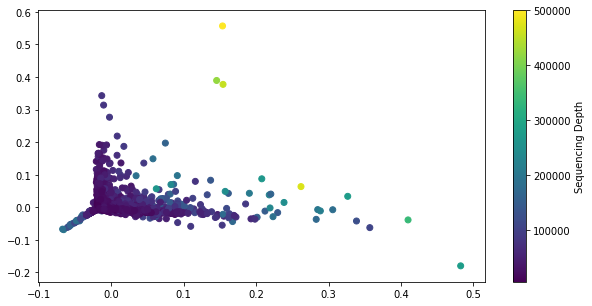

In [216]:
#PCA with raw, unnormalized data
x, y = plotPCA(otu_train, color = "raw")
otu_train2 = otu_train.drop(otu_train.index[np.where(y == max(y))[0][0]])
plotPCA(otu_train2, color = "input")
#WTF is this gradient? Color/correlation with sample covariate and PC1 coordinate and see if we can find that relationship.
#That is likely the variance that we will have to minimize with our normalizations

(array([-0.15847175, -0.06756925,  0.07560936, ...,  0.01149377,
        -0.05077003,  0.12229278]),
 array([ 0.30860105, -0.03923809, -0.01103133, ..., -0.01826972,
        -0.02555003,  0.02028262]))

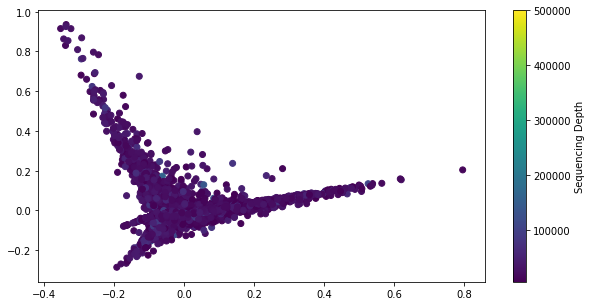

In [217]:
plotPCA(otu_rel_abund, color = "raw")
#Now there are two gradients. Is one of them the same as the previous gradient?

(array([ 0.04474456, -0.04311087, -0.20383032, ..., -0.06397025,
        -0.04599094, -0.07624629]),
 array([-0.0846602 , -0.0094391 , -0.09892015, ..., -0.08392613,
        -0.09990763,  0.08812284]))

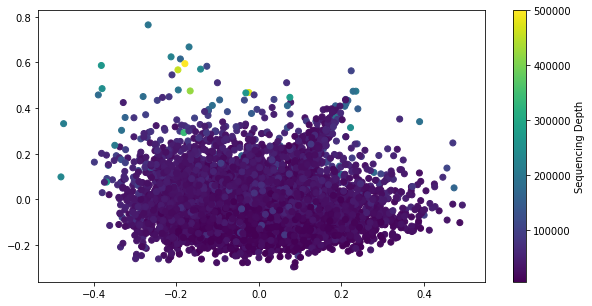

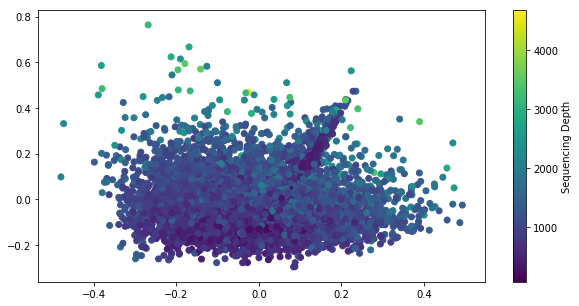

In [221]:
plotPCA(otu_logNorm, color = "raw")
plotPCA(otu_logNorm, color = "input")
#Looks good. We should use this for now. And also use this in our environmental data

(array([-0.02738134, -0.02803425, -0.02776681, ..., -0.02233959,
        -0.01673674, -0.01041628]),
 array([-0.0111374 ,  0.00713762,  0.02092297, ...,  0.00830253,
         0.00503349,  0.00712192]))

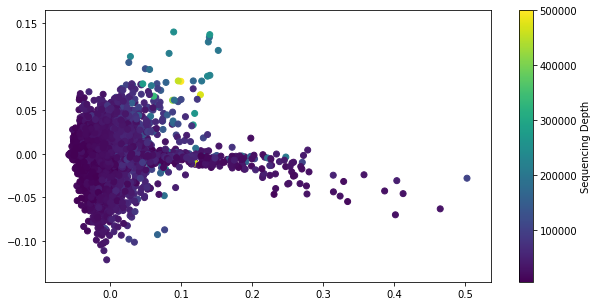

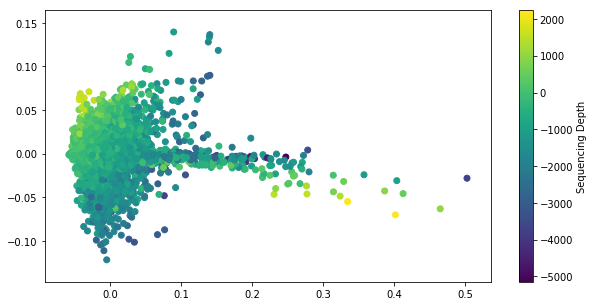

In [225]:
#While in the environmental data, the embeddings seem very influenced by sequencing depth, in the gut data, this is not the case.
#Probably because the sequencing depths are much closer to each other. Which means that it's still a problem that needs to be
#addressed. All the gut data will not always be from the same study.

plotPCA(embed(otu_logNorm, qual_vecs), color = "raw")
plotPCA(embed(otu_logNorm, qual_vecs), color = "input")